#### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms.**

**Feature magnitude matters because:**

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


**The machine learning models affected by the feature scale are:**

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)

**The Machine Learning model insensitive to feature magnitudes are:**

- Classification and Regression Trees 
- Random Forests 
- Gradient boosting Trees

**Techniques for Feature Scaling:**

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length


#### Unit Length / Unit Norm 

Scaling to vector length

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. Note that this normalisation procedure normalises the feature vector, and not the observation vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the observation vector, across observations for the same feature.

**Formula:**

$L_1$: *Manhattan Distance*

- $X_{scaled}$ = $\frac{X}{l_1(X)}$, where $l_1(X)$ = $|x_1| + |x_2| ... + |x_n|$

$L_2$: *Euclidean Distance*

- $X_{scaled}$ = $\frac{X}{l_2(X)}$, where $l_2(X)$ = $ \sqrt[2]{x_1^2 + x_2^2 ... + x_n^2}$


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

Note as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


![process](unit_norm.png)



Dataset: House price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

In [2]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0
                                                )

print(f"train {X_train.shape}, test {X_test.shape}")

train (354, 13), test (152, 13)


**Scaling with $L_1$**

In [4]:
# set up the scaler
scaler = Normalizer(norm='l1')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      

In [6]:
# let's calculate the norm for each observation (feature vector)
# scaled data

np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Now, each feature vector has a l1 norm of 1.

In [7]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
# let's look at the individual values of the variables in the original data
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [9]:
# let's look at the individual values of the variables in the original data

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.003022,0.014491,0.011731,0.000073,0.000620,0.007221,0.075687,0.004479,0.009336,0.427642,0.020880,0.411273,0.013544
std,0.007018,0.028764,0.006854,0.000283,0.000115,0.001620,0.029466,0.002780,0.007262,0.114922,0.003751,0.124328,0.007204
min,0.000008,0.000000,0.000577,0.000000,0.000424,0.002996,0.004348,0.000919,0.001163,0.250885,0.014363,0.000374,0.001879
25%,0.000093,0.000000,0.006243,0.000000,0.000545,0.006061,0.055411,0.002206,0.004740,0.346035,0.016876,0.318534,0.008473
50%,0.000311,0.000000,0.010421,0.000000,0.000611,0.007376,0.078917,0.003923,0.006021,0.393483,0.021129,0.456271,0.012262
75%,0.002983,0.024709,0.015120,0.000000,0.000657,0.008358,0.098186,0.006456,0.018223,0.526258,0.024014,0.498519,0.017204
max,0.066782,0.121905,0.035787,0.001422,0.001337,0.011541,0.144310,0.016269,0.028684,0.795970,0.030523,0.578661,0.041723


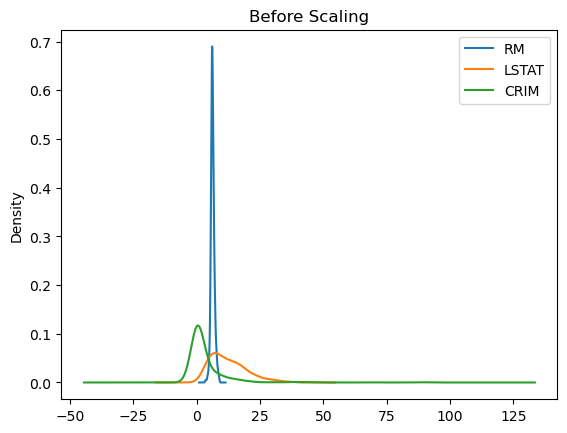

In [10]:
X_train[['RM', 'LSTAT', 'CRIM']].plot.kde()
plt.title("Before Scaling")
plt.show()

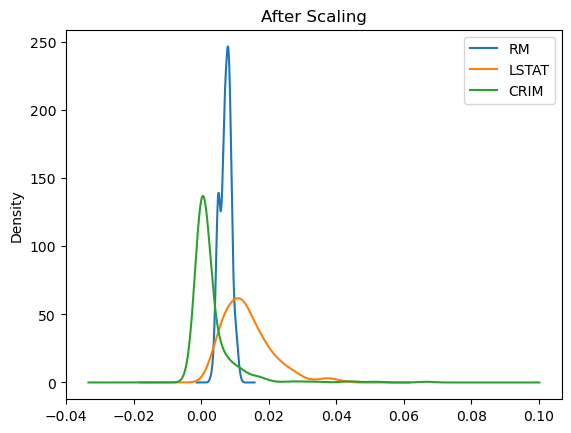

In [11]:
X_train_scaled[['RM', 'LSTAT', 'CRIM']].plot.kde()
plt.title("After Scaling")
plt.show()

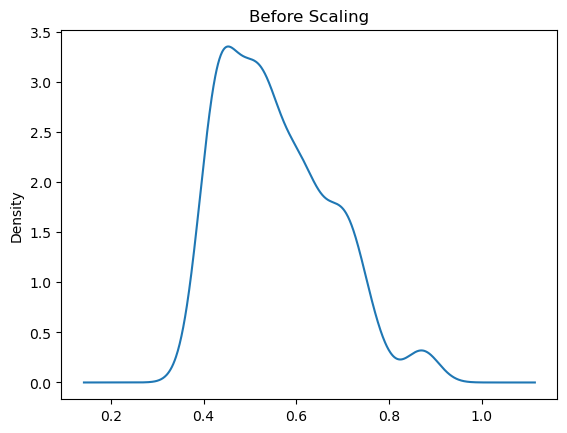

In [12]:
X_train['NOX'].plot.kde()
plt.title("Before Scaling")
plt.show()

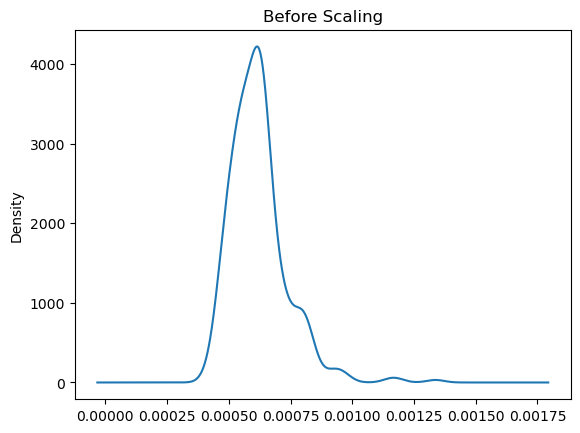

In [13]:
X_train_scaled['NOX'].plot.kde()
plt.title("Before Scaling")
plt.show()

**Scaling with $L_2$**

In [14]:
# set up the scaler
scaler = Normalizer(norm='l2')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
np.round( np.linalg.norm(X_train, ord=2, axis=1), 1)

array([600.5, 458.4, 598. , 519.1, 434. , 511. , 527.9, 496.7, 675.2,
       496.5, 450.2, 492.1, 453.5, 492.4, 492.9, 491.5, 770.1, 782.2,
       465.2, 759.8, 778.6, 535.3, 764.4, 781.5, 561.9, 562.8, 768.1,
       468.2, 725.5, 673.1, 458.8, 572.5, 559.8, 488. , 490.2, 488.9,
       441.3, 680.4, 675.6, 483.9, 483.9, 506.2, 474.8, 481.9, 517.8,
       747.8, 503.3, 438.2, 483. , 424. , 478.8, 519.9, 451.4, 546.2,
       558.3, 516.9, 773.8, 470.4, 467.5, 501.6, 674.5, 528.1, 508.2,
       677.1, 593.2, 556.5, 781.9, 465.9, 707.6, 509.6, 501.3, 449.4,
       512.5, 778.8, 483.6, 587.7, 485.4, 558.1, 673.1, 504.6, 494.9,
       509. , 589.2, 510.6, 777. , 439.2, 478.8, 593.3, 760. , 534.5,
       779.9, 586.6, 551.3, 558.4, 446.2, 418.8, 496. , 407.8, 676.2,
       782.8, 671. , 499. , 593.6, 482.6, 779.2, 456.1, 483.4, 573.4,
       456.5, 477.3, 493.3, 485.7, 490.5, 716.1, 497.2, 760.6, 524.9,
       672.1, 488.2, 443.7, 751. , 492.5, 424.3, 458.7, 783. , 596.4,
       482.9, 557.2,

In [22]:
# let's calculate the norm for each observation (feature vector)
# scaledl data

np.round( np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [23]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [26]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [27]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.004688,0.024027,0.018758,0.000120,0.000997,0.011640,0.122166,0.007251,0.014647,0.682156,0.033589,0.668592,0.021765
std,0.011049,0.048105,0.010982,0.000463,0.000187,0.002718,0.048931,0.004588,0.010624,0.152037,0.006168,0.203917,0.011661
min,0.000013,0.000000,0.000963,0.000000,0.000681,0.004682,0.006431,0.001499,0.001911,0.425977,0.024238,0.000475,0.003099
25%,0.000148,0.000000,0.010430,0.000000,0.000883,0.009432,0.088582,0.003363,0.007875,0.565434,0.027163,0.507064,0.013486
50%,0.000515,0.000000,0.016919,0.000000,0.000979,0.012099,0.126282,0.006399,0.010027,0.639890,0.033567,0.753246,0.019929
75%,0.004750,0.041516,0.023812,0.000000,0.001060,0.013580,0.158637,0.010516,0.030581,0.850914,0.038620,0.809355,0.027524
max,0.113081,0.207644,0.061249,0.002282,0.002053,0.018156,0.237626,0.027624,0.035766,0.992514,0.053097,0.889808,0.070063


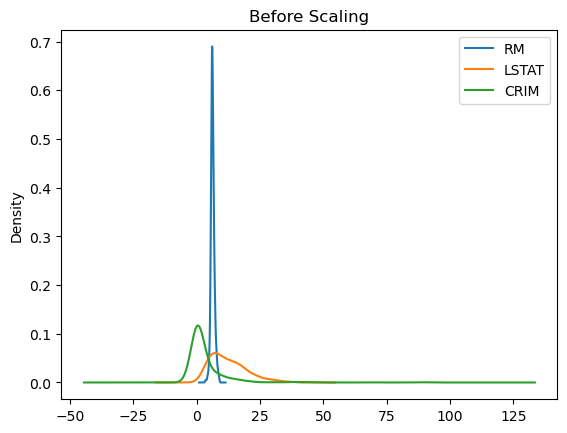

In [28]:
X_train[['RM', 'LSTAT', 'CRIM']].plot.kde()
plt.title("Before Scaling")
plt.show()

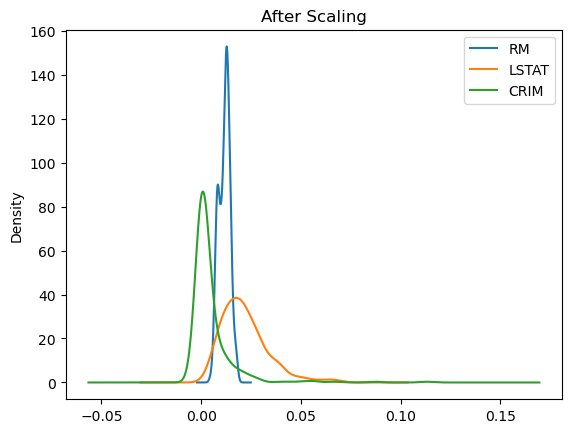

In [29]:
X_train_scaled[['RM', 'LSTAT', 'CRIM']].plot.kde()
plt.title("After Scaling")
plt.show()

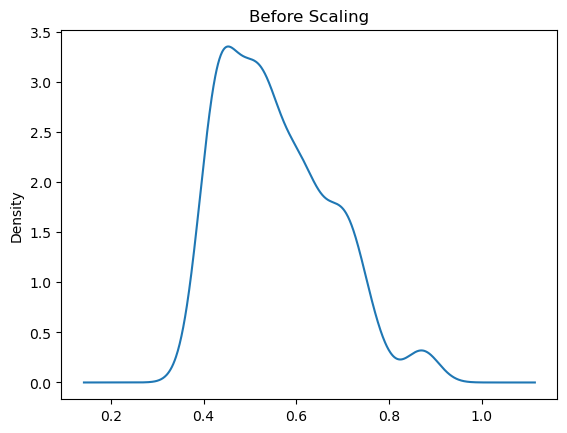

In [30]:
X_train['NOX'].plot.kde()
plt.title("Before Scaling")
plt.show()

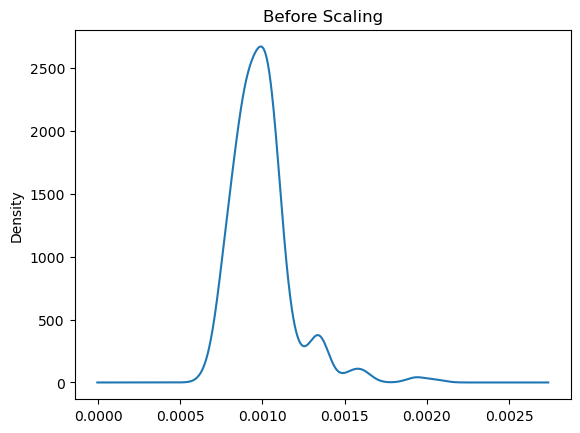

In [32]:
X_train_scaled['NOX'].plot.kde()
plt.title("Before Scaling")
plt.show()